In [252]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np

In [253]:
df = pd.read_csv('survey lung cancer.csv')
print(df)

    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2       

In [254]:
# DATA WRANGLING
# DATA PREPROCESSING
print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [255]:
print(df.shape)

(309, 16)


In [256]:
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [257]:
# IDENTIFY DATA TYPES
print(df.dtypes)

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [258]:
# IDENTIFY DUPLICATE VALUES
print('Total duplicate values: ', df.duplicated().sum())
data_duplicate = pd.DataFrame(df)
data = data_duplicate.drop_duplicates()
print(data)

Total duplicate values:  33
    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
279      F   59        1               2        2              2   
280      F   59        2               1        1              1   
281      M   55        2               1        1              1   
282      M   46        1               2        2              1   
283      M   60        1               2        2              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1        

In [259]:
# CHECK FOR NULL VALUE
print(data.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [260]:
#DATA NORMALIZATION (CENTERING/SCALING)
from sklearn.preprocessing import MinMaxScaler

## Copy data
normalized_data = data.copy()
column = 'Normalized_Age'

#APPLIED NORMALIZATION TECHNIQUES
normalized_data[column] = MinMaxScaler().fit_transform(
    np.array(data['AGE']).reshape(-1,1)
)
print(normalized_data['Normalized_Age'])

0      0.727273
1      0.803030
2      0.575758
3      0.636364
4      0.636364
         ...   
279    0.575758
280    0.575758
281    0.515152
282    0.378788
283    0.590909
Name: Normalized_Age, Length: 276, dtype: float64


In [261]:
# Adjust the order of column
new_order = [0, 1, 16, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
adjusted_data = pd.DataFrame(normalized_data[normalized_data.columns[new_order]])
print(adjusted_data)

    GENDER  AGE  Normalized_Age  SMOKING  YELLOW_FINGERS  ANXIETY  \
0        M   69        0.727273        1               2        2   
1        M   74        0.803030        2               1        1   
2        F   59        0.575758        1               1        1   
3        M   63        0.636364        2               2        2   
4        F   63        0.636364        1               2        1   
..     ...  ...             ...      ...             ...      ...   
279      F   59        0.575758        1               2        2   
280      F   59        0.575758        2               1        1   
281      M   55        0.515152        2               1        1   
282      M   46        0.378788        1               2        2   
283      M   60        0.590909        1               2        2   

     PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  \
0                1                1         2         1         2   
1                1               

In [262]:
# Data Binning for age variables
bins = [20, 40, 60, 100]
group_names = ["[20-40] years", "[41-60] years", "[60+] years"]
adjusted_data["AGE GROUPS"] = pd.cut(
    adjusted_data["AGE"], bins, labels = group_names)

age_group = adjusted_data['AGE GROUPS']
preProcessed_data = adjusted_data.drop(columns=['AGE GROUPS'])
preProcessed_data.insert(loc=2, column='AGE GROUPS', value=age_group)
print(preProcessed_data)

    GENDER  AGE     AGE GROUPS  Normalized_Age  SMOKING  YELLOW_FINGERS  \
0        M   69    [60+] years        0.727273        1               2   
1        M   74    [60+] years        0.803030        2               1   
2        F   59  [41-60] years        0.575758        1               1   
3        M   63    [60+] years        0.636364        2               2   
4        F   63    [60+] years        0.636364        1               2   
..     ...  ...            ...             ...      ...             ...   
279      F   59  [41-60] years        0.575758        1               2   
280      F   59  [41-60] years        0.575758        2               1   
281      M   55  [41-60] years        0.515152        2               1   
282      M   46  [41-60] years        0.378788        1               2   
283      M   60  [41-60] years        0.590909        1               2   

     ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  \
0          2         

In [263]:
## INDICATOR VARIABLES (for convert categorical data to indicator variables)
df_dc = pd.get_dummies(
    preProcessed_data, 
    columns = ['GENDER', 'AGE GROUPS', 'LUNG_CANCER'], dtype=int)

# Adjust the column arrangement
new_order1 = [15,16,0,1,17,18,19,2,3,4,5,6,7,8,9,10,11,12,13,14,20,21]
preProcessed_data1 = pd.DataFrame(df_dc[df_dc.columns[new_order1]])
print(preProcessed_data1)

     GENDER_F  GENDER_M  AGE  Normalized_Age  AGE GROUPS_[20-40] years  \
0           0         1   69        0.727273                         0   
1           0         1   74        0.803030                         0   
2           1         0   59        0.575758                         0   
3           0         1   63        0.636364                         0   
4           1         0   63        0.636364                         0   
..        ...       ...  ...             ...                       ...   
279         1         0   59        0.575758                         0   
280         1         0   59        0.575758                         0   
281         0         1   55        0.515152                         0   
282         0         1   46        0.378788                         0   
283         0         1   60        0.590909                         0   

     AGE GROUPS_[41-60] years  AGE GROUPS_[60+] years  SMOKING  \
0                           0                

In [264]:
## Export data frame to csv file
out_csv = "preprocessed_lungcancerdata.csv"
preProcessed_data1.to_csv(out_csv)

<h2>EXPLORATORY DATA ANALYSIS</h2>

In [265]:
# Import csv file into python
df = pd.read_csv('preprocessed_lungcancerdata.csv')

# drop unrelated column
df = df.drop(df.columns[0],axis=1)
print(df)

     GENDER_F  GENDER_M  AGE  Normalized_Age  AGE GROUPS_[20-40] years  \
0           0         1   69        0.727273                         0   
1           0         1   74        0.803030                         0   
2           1         0   59        0.575758                         0   
3           0         1   63        0.636364                         0   
4           1         0   63        0.636364                         0   
..        ...       ...  ...             ...                       ...   
271         1         0   59        0.575758                         0   
272         1         0   59        0.575758                         0   
273         0         1   55        0.515152                         0   
274         0         1   46        0.378788                         0   
275         0         1   60        0.590909                         0   

     AGE GROUPS_[41-60] years  AGE GROUPS_[60+] years  SMOKING  \
0                           0                

In [266]:
# Mean for the age and age groups columns
age = df[['AGE', 'AGE GROUPS_[20-40] years', 'AGE GROUPS_[41-60] years', 'AGE GROUPS_[60+] years']].mean()
print(age)

AGE                         62.909420
AGE GROUPS_[20-40] years     0.010870
AGE GROUPS_[41-60] years     0.380435
AGE GROUPS_[60+] years       0.608696
dtype: float64


In [267]:
# Variance for the age and age groups columns
age = df[['AGE', 'AGE GROUPS_[20-40] years', 'AGE GROUPS_[41-60] years', 'AGE GROUPS_[60+] years']].var()
print(age)

AGE                         70.213584
AGE GROUPS_[20-40] years     0.010791
AGE GROUPS_[41-60] years     0.236561
AGE GROUPS_[60+] years       0.239051
dtype: float64


In [268]:
# Std deviation for the age and age groups columns
age = df[['AGE', 'AGE GROUPS_[20-40] years', 'AGE GROUPS_[41-60] years', 'AGE GROUPS_[60+] years']].std()
print(age)

AGE                         8.379355
AGE GROUPS_[20-40] years    0.103877
AGE GROUPS_[41-60] years    0.486376
AGE GROUPS_[60+] years      0.488929
dtype: float64


In [269]:
# Mean for the gender columns (female and male)
gender = df[['GENDER_F', 'GENDER_M']].mean()
print(gender)

GENDER_F    0.485507
GENDER_M    0.514493
dtype: float64


In [270]:
# variance for the gender columns (female and male)
gender = df[['GENDER_F', 'GENDER_M']].var()
print(gender)

GENDER_F    0.250698
GENDER_M    0.250698
dtype: float64


In [271]:
# Std deviation for the gender columns (female and male)
gender = df[['GENDER_F', 'GENDER_M']].std()
print(gender)

GENDER_F    0.500698
GENDER_M    0.500698
dtype: float64


In [272]:
# Mean for the lung cancer columns (yes or no)
lung_cancer = df[['LUNG_CANCER_NO', 'LUNG_CANCER_YES']].mean()
print(lung_cancer)


LUNG_CANCER_NO     0.137681
LUNG_CANCER_YES    0.862319
dtype: float64


In [273]:
# Variance for the lung cancer columns (yes or no)
lung_cancer = df[['LUNG_CANCER_NO', 'LUNG_CANCER_YES']].var()
print(lung_cancer)


LUNG_CANCER_NO     0.119157
LUNG_CANCER_YES    0.119157
dtype: float64


In [274]:
# Std variance for the lung cancer columns (yes or no)
lung_cancer = df[['LUNG_CANCER_NO', 'LUNG_CANCER_YES']].std()
print(lung_cancer)


LUNG_CANCER_NO     0.345191
LUNG_CANCER_YES    0.345191
dtype: float64


In [275]:
# Mode of the columns
df[['AGE', 'AGE GROUPS_[20-40] years', 'AGE GROUPS_[41-60] years', 'AGE GROUPS_[60+] years', 'GENDER_F', 'GENDER_M', 'LUNG_CANCER_NO', 'LUNG_CANCER_YES']].mode()

,AGE,AGE GROUPS_[20-40] years,AGE GROUPS_[41-60] years,AGE GROUPS_[60+] years,GENDER_F,GENDER_M,LUNG_CANCER_NO,LUNG_CANCER_YES
0,64,0,0,1,0,1,0,1


In [276]:
# Describe the columns
df[['AGE', 'AGE GROUPS_[20-40] years', 'AGE GROUPS_[41-60] years', 'AGE GROUPS_[60+] years', 'GENDER_F', 'GENDER_M', 
    'LUNG_CANCER_NO', 'LUNG_CANCER_YES']].describe(include="all")

,AGE,AGE GROUPS_[20-40] years,AGE GROUPS_[41-60] years,AGE GROUPS_[60+] years,GENDER_F,GENDER_M,LUNG_CANCER_NO,LUNG_CANCER_YES
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,0.010870,0.380435,0.608696,0.485507,0.514493,0.137681,0.862319
std,8.379355,0.103877,0.486376,0.488929,0.500698,0.500698,0.345191,0.345191
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,62.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,69.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,87.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Boxplot of Age')

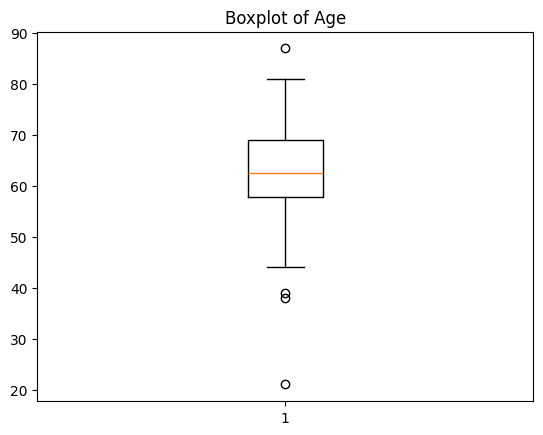

In [277]:
import matplotlib.pyplot as plt 
plt.boxplot(df['AGE'])
plt.title("Boxplot of Age")

In [278]:
# DATA.CORRELATION
data=pd.read_csv('preprocessed_lungcancerdata.csv')

# DROP UNRELATED COLUMN
data = data.drop(data.columns[0], axis = 1)
corr_data = data.corr()
print(corr_data)

                          GENDER_F  GENDER_M       AGE  Normalized_Age  \
GENDER_F                  1.000000 -1.000000  0.013120        0.013120   
GENDER_M                 -1.000000  1.000000 -0.013120       -0.013120   
AGE                       0.013120 -0.013120  1.000000        1.000000   
Normalized_Age            0.013120 -0.013120  1.000000        1.000000   
AGE GROUPS_[20-40] years  0.037997 -0.037997 -0.379034       -0.379034   
AGE GROUPS_[41-60] years  0.000325 -0.000325 -0.683897       -0.683897   
AGE GROUPS_[60+] years   -0.008396  0.008396  0.760855        0.760855   
SMOKING                  -0.041131  0.041131 -0.073410       -0.073410   
YELLOW_FINGERS            0.202506 -0.202506  0.025773        0.025773   
ANXIETY                   0.152032 -0.152032  0.050605        0.050605   
PEER_PRESSURE             0.261427 -0.261427  0.037848        0.037848   
CHRONIC DISEASE           0.189925 -0.189925 -0.003431       -0.003431   
FATIGUE                   0.079020 -0.

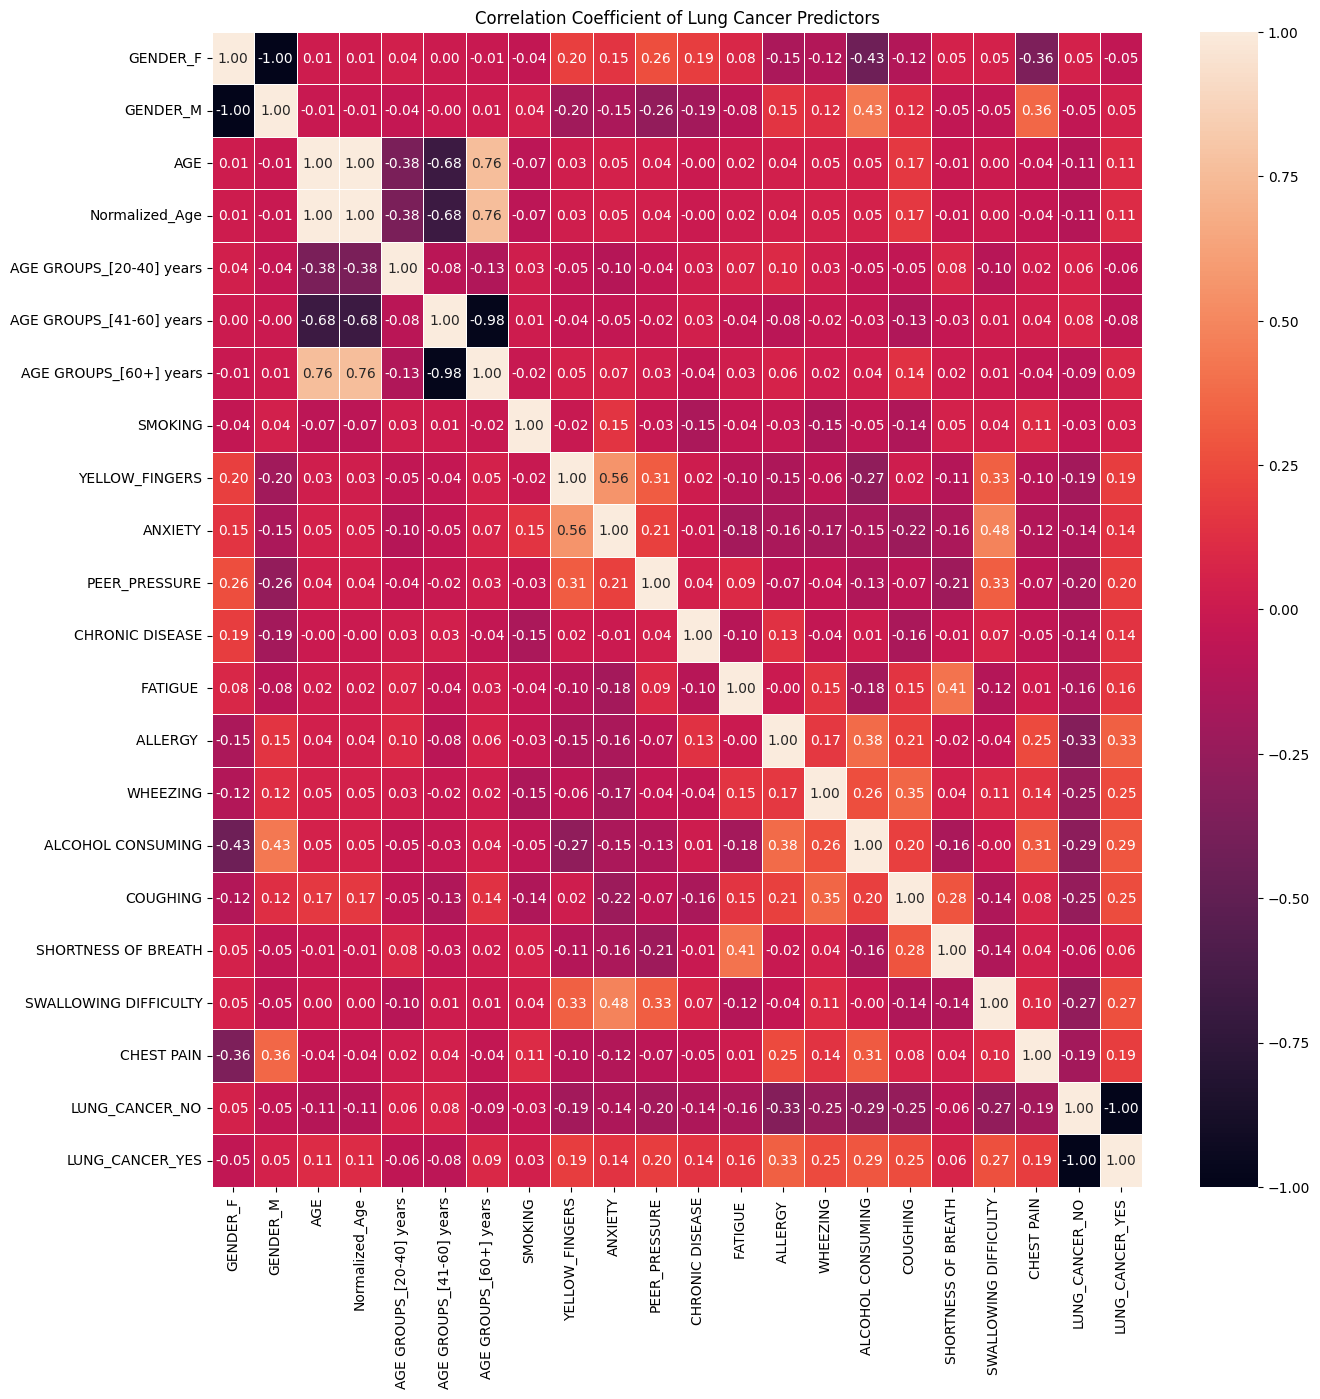

In [279]:
import matplotlib.pyplot as mp 
import seaborn as sns

mp.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,fmt='0.2f')
mp.title('Correlation Coefficient of Lung Cancer Predictors')
mp.show()

<h2> MODEL DEVELOPMENT </h2>

In [280]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [281]:
preProcessed_data['GENDER'].replace(['M', 'F'],[1,0],inplace=True)
print(preProcessed_data.head(5))

   GENDER  AGE     AGE GROUPS  Normalized_Age  SMOKING  YELLOW_FINGERS  \
0       1   69    [60+] years        0.727273        1               2   
1       1   74    [60+] years        0.803030        2               1   
2       0   59  [41-60] years        0.575758        1               1   
3       1   63    [60+] years        0.636364        2               2   
4       0   63    [60+] years        0.636364        1               2   

   ANXIETY  PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  \
0        2              1                1         2         1         2   
1        1              1                2         2         2         1   
2        1              2                1         2         1         2   
3        2              1                1         1         1         1   
4        1              1                1         1         1         2   

   ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  \
0                  2

In [282]:
# AGE / AGE GROUPS / NORMALIZED_AGE are decribing same thing using diff ways, so may include 1 (AGE GROUPS) is enough?
preProcessed_data['AGE GROUPS'].replace(["[20-40] years", "[41-60] years", "[60+] years"],[0,1,2], inplace = True)
print(preProcessed_data.head(5))
preProcessed_data['LUNG_CANCER'].replace(['YES','NO'],[1,0], inplace = True)
print(preProcessed_data.head(5))


   GENDER  AGE AGE GROUPS  Normalized_Age  SMOKING  YELLOW_FINGERS  ANXIETY  \
0       1   69          2        0.727273        1               2        2   
1       1   74          2        0.803030        2               1        1   
2       0   59          1        0.575758        1               1        1   
3       1   63          2        0.636364        2               2        2   
4       0   63          2        0.636364        1               2        1   

   PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  \
0              1                1         2         1         2   
1              1                2         2         2         1   
2              2                1         2         1         2   
3              1                1         1         1         1   
4              1                1         1         1         2   

   ALCOHOL CONSUMING  COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  \
0                  2         2              

In [283]:
out_csv = "modeldev_lungcancerdata.csv"
preProcessed_data.to_csv(out_csv)

In [284]:
lung_data = pd.read_csv('modeldev_lungcancerdata.csv')
X = lung_data.copy()

# drop SAMPLE column
X_2=X.drop(X.columns[0],axis=1)
X_3=X_2.drop(X_2.columns[1],axis=1)
X_4=X_3.drop(X_3.columns[2],axis=1)
X_5=X_4.drop(X_4.columns[15],axis=1)
print(X_5.columns)
y = lung_data.pop('LUNG_CANCER')



Index(['GENDER', 'AGE GROUPS', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')


In [285]:
# TRAIN MODEL
X_train, X_test, y_train, y_test = train_test_split(X_5,y,test_size = 0.3, shuffle=False)
X_train.shape, X_test.shape

((193, 15), (83, 15))

In [286]:
# perform RFE via RandomForestClassifier 
rf = RandomForestClassifier(random_state=0)
selector = RFE(estimator=rf, step=1,n_features_to_select=10)
selector = selector.fit(X_train,y_train)
#print('Feature selected Column: X_5.columns[selector.support_]) 
#print("Feature ranking: ", selector.ranking_)

feature = X_train.columns[selector.get_support()] 
print(feature)

Index(['AGE GROUPS', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'ALCOHOL CONSUMING',
       'SHORTNESS OF BREATH', 'CHEST PAIN'],
      dtype='object')


In [287]:
# Get list of features selected
features_kept = pd.DataFrame({'columns' : X_5.columns, 'Kept':selector.support_})
features_kept

,columns,Kept
0,GENDER,False
1,AGE GROUPS,True
2,SMOKING,False
3,YELLOW_FINGERS,True
4,ANXIETY,True
5,PEER_PRESSURE,True
6,CHRONIC DISEASE,True
7,FATIGUE,True
8,ALLERGY,True
9,WHEEZING,False


In [288]:
# Get list of features ranking
rank = pd.DataFrame({'columns' : X_5.columns, 'Kept': selector.ranking_})
rank

,columns,Kept
0,GENDER,3
1,AGE GROUPS,1
2,SMOKING,5
3,YELLOW_FINGERS,1
4,ANXIETY,1
5,PEER_PRESSURE,1
6,CHRONIC DISEASE,1
7,FATIGUE,1
8,ALLERGY,1
9,WHEEZING,2


<h2>MODEL EVALUATION</h2>

In [289]:
# Conduct Stratified 10-fold cross validation
skf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)

In [290]:
# Cross val score is used to prevent over-fitting and promote nodel generalisation
n_scores = cross_val_score(rf, X_5, y, scoring = 'accuracy', cv=skf) 
print('Mean score is %0.2f '% (n_scores.mean()))

Mean score is 0.89 


In [291]:
# Predict the accuracy of lung cancer's symptoms 
y_pred = selector.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9397590361445783


In [292]:
# Predict the precision of lung cancer's symptoms 
y_pred = selector.predict(X_test)
print("Precision: ", metrics.precision_score(y_test, y_pred))

Precision:  0.9577464788732394


In [293]:
#Predict the recall of Lung cancer's symptoms
y_pred = selector.predict(X_test)
print("Recall: ", metrics.recall_score(y_test, y_pred))

Recall:  0.9714285714285714


    y_actual  y_pred
0          1       1
1          1       1
2          0       1
3          0       1
4          0       1
..       ...     ...
78         1       1
79         1       1
80         0       1
81         1       0
82         1       1

[83 rows x 2 columns] 


Predicted   0   1
Actual           
0           1  16
1          11  55


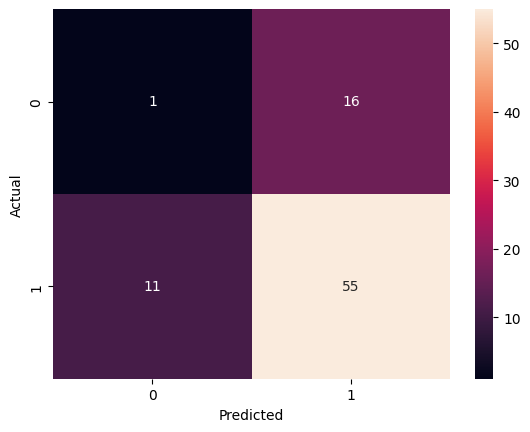

In [294]:
# Evaluate predictive model using Confusion Matrix 2 data_pred pd.DataFrame({'y_pred':y_pred))
data_pred = pd.DataFrame({'y_pred':y_pred})
data_actual = pd.DataFrame({'y_actual':y})
data_merged = pd.merge(data_actual, data_pred, left_index=True,right_index=True)
print(data_merged, '\n\n')

confusion_matrix = pd.crosstab(data_merged['y_actual'], data_merged['y_pred'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [295]:
# （True positive + True Negative) / Total predictions                
print("Confusion Matrix's Accuracy: ", (55+1)/83)

Confusion Matrix's Accuracy:  0.6746987951807228


In [296]:
# True positive / (True Negative + False Positive)
print("Confusion Matrix's Precision: ", 55/(55+16))

Confusion Matrix's Precision:  0.7746478873239436


In [297]:
# True positive / (True Positive + False Negative)
print("Confusion Matrix's Recall: ", 55/(55+11))

Confusion Matrix's Recall:  0.8333333333333334
